In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import classification_report,roc_auc_score, roc_curve,accuracy_score

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import lime
import lime.lime_tabular
import shap
from sklearn.manifold import TSNE

In [2]:
json_file = 'yelp_academic_dataset_business[1].json'
data = []
with open(json_file, 'r', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))
df_business = pd.DataFrame(data)
df_business.to_csv('yelp_academic_dataset_business.csv', index=False)

In [3]:
json_file = 'yelp_academic_dataset_checkin[1].json'
data = []
with open(json_file, 'r', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))
df_checkin = pd.DataFrame(data)
df_checkin.to_csv('yelp_academic_dataset_checkin.csv', index=False)

In [4]:
json_file = 'yelp_academic_dataset_review[1].json'
data = []
with open(json_file, 'r', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))
df_review = pd.DataFrame(data)
df_review.to_csv('yelp_academic_dataset_review.csv', index=False)

In [5]:
json_file = 'yelp_academic_dataset_tip[1].json'
data = []
with open(json_file, 'r', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))
df_tip = pd.DataFrame(data)
df_tip.to_csv('yelp_academic_dataset_tip.csv', index=False)

In [6]:
json_file = 'yelp_academic_dataset_user[1].json'
data = []
with open(json_file, 'r', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))
df_user = pd.DataFrame(data)
df_user.to_csv('yelp_academic_dataset_user.csv', index=False)

In [7]:
df_business.head()

business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.955505  -75.155564    4.0            80        1   
4  40.338183  -75.471659    4.5            13        1   

                                          attributes  \
0                      {'ByAppointmentOnly': 'True'}   
1             {'BusinessAcceptsCreditCards': 'True'}   
2  {'BikeParking': 'True', 'BusinessAcceptsCredit...   
3  {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
4  {'BusinessAcceptsCreditCards': 'True', 'Wheelc...   

                                          categories  \
0  Doctors, Traditional Chinese Medicine, Naturop...   
1  Shipping Centers, Local Services, Notaries, Ma...   
2  Department Stores, Shopping, Fashion, Home & G...   
3  Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                          Brewpubs, Breweries, Food   

                                               hours  
0                                               None  
1  {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...  
2  {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...  
3  {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...  
4  {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...

In [8]:
df_checkin.head()

business_id                                               date
0  ---kPU91CF4Lq2-WlRu9Lw  2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...
1  --0iUa4sNDFiZFrAdIWhZQ  2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011...
2  --30_8IhuyMHbSOcNWd6DQ           2013-06-14 23:29:17, 2014-08-13 23:20:22
3  --7PUidqRWpRSpXebiyxTg  2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012...
4  --7jw19RH9JKXgFohspgQw  2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014...

In [9]:
df_review.head()

review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delicious.   Our favo...  2015-01-04 00:01:03  
4  Cute interior and owner (?) gave us tour of up...  2017-01-14 20:54:15

In [10]:
df_tip.head()

user_id             business_id  \
0  AGNUgVwnZUey3gcPCJ76iw  3uLgwr0qeCNMjKenHJwPGQ   
1  NBN4MgHP9D3cw--SnauTkA  QoezRbYQncpRqyrLH6Iqjg   
2  -copOvldyKh1qr-vzkDEvw  MYoRNLb5chwjQe3c_k37Gg   
3  FjMQVZjSqY8syIO-53KFKw  hV-bABTK-glh5wj31ps_Jw   
4  ld0AperBXk1h6UbqmM80zw  _uN0OudeJ3Zl_tf6nxg5ww   

                                                text                 date  \
0                     Avengers time with the ladies.  2012-05-18 02:17:21   
1  They have lots of good deserts and tasty cuban...  2013-02-05 18:35:10   
2             It's open even when you think it isn't  2013-08-18 00:56:08   
3                          Very decent fried chicken  2017-06-27 23:05:38   
4             Appetizers.. platter special for lunch  2012-10-06 19:43:09   

   compliment_count  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [11]:
df_user.head()

user_id    name  review_count        yelping_since  useful  \
0  qVc8ODYU5SZjKXVBgXdI7w  Walker           585  2007-01-25 16:47:26    7217   
1  j14WgRoU_-2ZE1aw1dXrJg  Daniel          4333  2009-01-25 04:35:42   43091   
2  2WnXYQFK0hXEoTxPtV2zvg   Steph           665  2008-07-25 10:41:00    2086   
3  SZDeASXq7o05mMNLshsdIA    Gwen           224  2005-11-29 04:38:33     512   
4  hA5lMy-EnncsH4JoR-hFGQ   Karen            79  2007-01-05 19:40:59      29   

   funny   cool                                              elite  \
0   1259   5994                                               2007   
1  13066  27281  2009,2010,2011,2012,2013,2014,2015,2016,2017,2...   
2   1010   1003                           2009,2010,2011,2012,2013   
3    330    299                                     2009,2010,2011   
4     15      7                                                      

                                             friends  fans  ...  \
0  NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...   267  ...   
1  ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...  3138  ...   
2  LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...    52  ...   
3  enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...    28  ...   
4  PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...     1  ...   

   compliment_more  compliment_profile  compliment_cute  compliment_list  \
0               65                  55               56               18   
1              264                 184              157              251   
2               13                  10               17                3   
3                4                   1                6                2   
4                1                   0                0                0   

   compliment_note  compliment_plain  compliment_cool  compliment_funny  \
0              232               844              467               467   
1             1847              7054             3131              3131   
2               66                96              119               119   
3               12                16               26                26   
4                1                 1                0                 0   

   compliment_writer  compliment_photos  
0                239                180  
1               1521               1946  
2                 35                 18  
3                 10                  9  
4                  0                  0  

[5 rows x 22 columns]

In [12]:
print("df_business",df_business.shape)
print("df_checkin",df_checkin.shape)
print("df_review",df_review.shape)
print("df_tip",df_tip.shape)
print("df_user",df_user.shape)

df_business (150346, 14)
df_checkin (131930, 2)
df_review (6990280, 9)
df_tip (908915, 5)
df_user (1987897, 22)


In [13]:
#df_business.describe(include='all')

In [14]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [15]:
df_business.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

In [16]:
df_business.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [17]:
df_business['latitude'].nunique()

135593

In [18]:
df_business['longitude'].nunique()

131918

In [19]:
df_business['stars'].nunique()

9

In [20]:
df_business['review_count'].nunique()

1158

In [21]:
df_business['is_open'].nunique()

2

In [22]:
df_business['is_open'].value_counts()

is_open
1    119698
0     30648
Name: count, dtype: int64

In [23]:
df_checkin.shape

(131930, 2)

In [24]:
df_checkin.describe(include='all')

business_id  \
count                   131930   
unique                  131930   
top     ---kPU91CF4Lq2-WlRu9Lw   
freq                         1   

                                                     date  
count                                              131930  
unique                                             131930  
top     2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...  
freq                                                    1

In [25]:
df_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [26]:
df_checkin.dtypes

business_id    object
date           object
dtype: object

In [27]:
df_checkin.isnull().sum()

business_id    0
date           0
dtype: int64

In [28]:
df_checkin['business_id'].nunique()

131930

In [29]:
df_checkin['date'].nunique()

131930

In [30]:
df_review.shape

(6990280, 9)

In [31]:
#df_review.describe(include='all')

In [32]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


In [33]:
df_review.dtypes

review_id       object
user_id         object
business_id     object
stars          float64
useful           int64
funny            int64
cool             int64
text            object
date            object
dtype: object

In [34]:
df_review.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [35]:
df_review['stars'].nunique()

5

In [36]:
df_review['useful'].nunique()

259

In [37]:
df_review['funny'].nunique()

201

In [38]:
df_review['cool'].nunique()

210

In [39]:
df_tip.shape

(908915, 5)

In [40]:
df_tip.describe(include='all')

user_id             business_id        text  \
count                   908915                  908915      908915   
unique                  301758                  106193      851033   
top     fCvMnJU1Z-XhAjKg99wK3Q  FEXhWNCMkv22qG04E83Qjg  Great food   
freq                      4071                    2571         598   
mean                       NaN                     NaN         NaN   
std                        NaN                     NaN         NaN   
min                        NaN                     NaN         NaN   
25%                        NaN                     NaN         NaN   
50%                        NaN                     NaN         NaN   
75%                        NaN                     NaN         NaN   
max                        NaN                     NaN         NaN   

                       date  compliment_count  
count                908915     908915.000000  
unique               906694               NaN  
top     2014-02-20 04:09:37               NaN  
freq                      6               NaN  
mean                    NaN          0.012525  
std                     NaN          0.120763  
min                     NaN          0.000000  
25%                     NaN          0.000000  
50%                     NaN          0.000000  
75%                     NaN          0.000000  
max                     NaN          6.000000

In [41]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           908915 non-null  object
 1   business_id       908915 non-null  object
 2   text              908915 non-null  object
 3   date              908915 non-null  object
 4   compliment_count  908915 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 34.7+ MB


In [42]:
df_tip.dtypes

user_id             object
business_id         object
text                object
date                object
compliment_count     int64
dtype: object

In [43]:
df_tip.isnull().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

In [44]:
df_tip['user_id'].nunique()

301758

In [45]:
df_tip['business_id'].nunique()

106193

In [46]:
df_tip['text'].nunique()

851033

In [47]:
df_tip['date'].nunique()

906694

In [48]:
df_tip['compliment_count'].nunique()

7

In [49]:
df_tip['compliment_count'].value_counts()

compliment_count
0    898376
1      9821
2       617
3        82
4        14
5         3
6         2
Name: count, dtype: int64

In [50]:
df_user.shape

(1987897, 22)

In [51]:
#df_user.describe(include='all')

In [52]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


In [53]:
df_user.dtypes

user_id                object
name                   object
review_count            int64
yelping_since          object
useful                  int64
funny                   int64
cool                    int64
elite                  object
friends                object
fans                    int64
average_stars         float64
compliment_hot          int64
compliment_more         int64
compliment_profile      int64
compliment_cute         int64
compliment_list         int64
compliment_note         int64
compliment_plain        int64
compliment_cool         int64
compliment_funny        int64
compliment_writer       int64
compliment_photos       int64
dtype: object

In [54]:
df_user.isnull().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

In [55]:
review_agg = df_review.groupby('business_id').agg({'stars': ['mean', 'count']}).reset_index()
review_agg.columns = ['business_id', 'avg_review_rating', 'review_count']

In [56]:
# Aggregating check-ins by business
checkin_agg = df_checkin.groupby('business_id').size().reset_index(name='checkin_count')

In [57]:
# Aggregating tips by business
tip_agg = df_tip.groupby('business_id').size().reset_index(name='tip_count')

In [58]:
# Merge data on 'business_id'
df_merged = pd.merge(df_business, review_agg, on='business_id', how='left')
df_merged = pd.merge(df_merged, checkin_agg, on='business_id', how='left')
df_merged = pd.merge(df_merged, tip_agg, on='business_id', how='left')

In [59]:
# Fill missing values with 0 (for check-ins and tips)
df_merged.fillna(0, inplace=True)

In [60]:
df_merged.head()

business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count_x  is_open  \
0  34.426679 -119.711197    5.0               7        0   
1  38.551126  -90.335695    3.0              15        1   
2  32.223236 -110.880452    3.5              22        0   
3  39.955505  -75.155564    4.0              80        1   
4  40.338183  -75.471659    4.5              13        1   

                                          attributes  \
0                      {'ByAppointmentOnly': 'True'}   
1             {'BusinessAcceptsCreditCards': 'True'}   
2  {'BikeParking': 'True', 'BusinessAcceptsCredit...   
3  {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
4  {'BusinessAcceptsCreditCards': 'True', 'Wheelc...   

                                          categories  \
0  Doctors, Traditional Chinese Medicine, Naturop...   
1  Shipping Centers, Local Services, Notaries, Ma...   
2  Department Stores, Shopping, Fashion, Home & G...   
3  Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                          Brewpubs, Breweries, Food   

                                               hours  avg_review_rating  \
0                                                  0           4.857143   
1  {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...           3.133333   
2  {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...           3.500000   
3  {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...           4.057471   
4  {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...           4.692308   

   review_count_y  checkin_count  tip_count  
0               7            1.0        0.0  
1              15            1.0        1.0  
2              24            1.0        8.0  
3              87            1.0       10.0  
4              13            1.0        1.0

In [61]:
df_merged.shape

(150346, 18)

In [62]:
#df_merged.describe(include='all')

In [63]:
df_merged.isnull().sum()

business_id          0
name                 0
address              0
city                 0
state                0
postal_code          0
latitude             0
longitude            0
stars                0
review_count_x       0
is_open              0
attributes           0
categories           0
hours                0
avg_review_rating    0
review_count_y       0
checkin_count        0
tip_count            0
dtype: int64

In [64]:
df_merged.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count_x', 'is_open',
       'attributes', 'categories', 'hours', 'avg_review_rating',
       'review_count_y', 'checkin_count', 'tip_count'],
      dtype='object')

In [65]:
df_merged['business_id'].nunique()

150346

In [66]:
df_merged['name'].nunique()

114117

In [67]:
df_merged['address'].nunique()

122844

In [68]:
df_merged['city'].nunique()

1416

In [69]:
df_merged['state'].nunique()

27

In [70]:
df_merged['postal_code'].nunique()

3362

In [71]:
df_merged['latitude'].nunique()

135593

In [72]:
df_merged['longitude'].nunique()

131918

In [73]:
df_merged['stars'].nunique()

9

In [74]:
df_merged['review_count_x'].nunique()

1158

In [75]:
#df_merged['attributes'].nunique()

In [76]:
df_merged['categories'].nunique()

83161

In [77]:
#df_merged['hours'].nunique()

In [78]:
df_merged['avg_review_rating'].nunique()

17055

In [79]:
df_merged['review_count_y'].nunique()

1190

In [80]:
df_merged['checkin_count'].nunique()

2

In [81]:
df_merged['tip_count'].nunique()

306

In [82]:
df_merged.dtypes

business_id           object
name                  object
address               object
city                  object
state                 object
postal_code           object
latitude             float64
longitude            float64
stars                float64
review_count_x         int64
is_open                int64
attributes            object
categories            object
hours                 object
avg_review_rating    float64
review_count_y         int64
checkin_count        float64
tip_count            float64
dtype: object

In [83]:
df_merged.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count_x', 'is_open',
       'attributes', 'categories', 'hours', 'avg_review_rating',
       'review_count_y', 'checkin_count', 'tip_count'],
      dtype='object')

In [84]:
df_merged.head()

business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count_x  is_open  \
0  34.426679 -119.711197    5.0               7        0   
1  38.551126  -90.335695    3.0              15        1   
2  32.223236 -110.880452    3.5              22        0   
3  39.955505  -75.155564    4.0              80        1   
4  40.338183  -75.471659    4.5              13        1   

                                          attributes  \
0                      {'ByAppointmentOnly': 'True'}   
1             {'BusinessAcceptsCreditCards': 'True'}   
2  {'BikeParking': 'True', 'BusinessAcceptsCredit...   
3  {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
4  {'BusinessAcceptsCreditCards': 'True', 'Wheelc...   

                                          categories  \
0  Doctors, Traditional Chinese Medicine, Naturop...   
1  Shipping Centers, Local Services, Notaries, Ma...   
2  Department Stores, Shopping, Fashion, Home & G...   
3  Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                          Brewpubs, Breweries, Food   

                                               hours  avg_review_rating  \
0                                                  0           4.857143   
1  {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...           3.133333   
2  {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...           3.500000   
3  {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...           4.057471   
4  {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...           4.692308   

   review_count_y  checkin_count  tip_count  
0               7            1.0        0.0  
1              15            1.0        1.0  
2              24            1.0        8.0  
3              87            1.0       10.0  
4              13            1.0        1.0

In [85]:
# Target: 'is_open' to determine if business is validated
X = df_merged[['latitude', 'longitude', 'stars', 'review_count_x',
       'avg_review_rating','review_count_y', 'checkin_count', 'tip_count']]  # Features
y = df_merged['is_open']  # Target

In [86]:
# Split data into train and test sets
X_train_df, X_test_df, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
X_train_df.columns

Index(['latitude', 'longitude', 'stars', 'review_count_x', 'avg_review_rating',
       'review_count_y', 'checkin_count', 'tip_count'],
      dtype='object')

In [88]:
num_cols = X_train_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train_df.select_dtypes(include=['object', 'category']).columns

In [89]:
#X_train_num_df = X_train_df[num_cols]
#X_train_cat = X_train_df[cat_cols]

In [90]:
scaler = StandardScaler()

In [91]:
# Fit the scaler to the numerical features and transform them
X_train = scaler.fit_transform(X_train_df)

In [92]:
# Convert the scaled array back to a DataFrame with appropriate column names
X_train = pd.DataFrame(X_train, index=X_train_df.index, columns=X_train_df.columns)

In [93]:
#X_train_cat_enc = pd.get_dummies(X_train_cat, drop_first=True)

In [94]:
#X_train = pd.concat([X_train_num.reset_index(drop=True), X_train_cat_enc.reset_index(drop=True)], axis=1)

In [95]:
# Now X_train contains both numerical and one-hot encoded categorical features
X_train.head()

latitude  longitude     stars  review_count_x  avg_review_rating  \
46317  -1.488195   0.470805 -2.149096        0.070639          -2.314353   
89562  -0.761762  -1.446431  0.414899       -0.209876           0.274242   
80031   0.601706   0.970432 -0.610699        0.079139          -0.644706   
103067  0.563948   0.949596 -0.610699       -0.167374          -0.568920   
100781 -1.453317   0.441733 -0.097900       -0.277880           0.083765   

        review_count_y  checkin_count  tip_count  
46317         0.055294       0.371811  -0.163207  
89562        -0.217515       0.371811   0.105466  
80031         0.096628       0.371811   0.051732  
103067       -0.167914       0.371811   0.051732  
100781       -0.283651       0.371811  -0.270677

In [96]:
#num_cols = X_test_df.select_dtypes(include=['int64', 'float64']).columns
#cat_cols = X_test_df.select_dtypes(include=['object', 'category']).columns

In [97]:
X_test = scaler.fit_transform(X_test_df)

In [98]:
X_test = pd.DataFrame(X_test, index=X_test_df.index, columns=X_test_df.columns)

In [99]:
#X_test_cat_enc = pd.get_dummies(X_test_df, drop_first=True)

In [100]:
#X_test = pd.concat([X_test_df.reset_index(drop=True), X_test_cat_enc.reset_index(drop=True)], axis=1)

In [101]:
X_test.head()

latitude  longitude     stars  review_count_x  avg_review_rating  \
91932 -0.383875  -2.044106  0.925345       -0.289269           0.816500   
87608  0.330146  -0.067702  0.411447        0.277186           0.340181   
49133  1.172720  -1.806580 -0.616350       -0.048719          -0.541130   
22983 -1.514314   0.445336  0.411447       -0.312548           0.634243   
9220   0.521021   0.203229 -0.102452       -0.134076          -0.243567   

       review_count_y  checkin_count  tip_count  
91932       -0.293880       0.377811  -0.341015  
87608        0.287508       0.377811  -0.172325  
49133       -0.037163       0.377811  -0.116095  
22983       -0.316531       0.377811  -0.341015  
9220        -0.142870       0.377811  -0.284785

In [102]:
X_train.shape

(105242, 8)

In [103]:
X_test.shape

(45104, 8)

### Visualization

In [105]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)

In [106]:
X_train_tsne = tsne.fit_transform(X_train)

In [107]:
X_train_tsne_df = pd.DataFrame(X_train_tsne, columns=['TSNE1', 'TSNE2'])
X_train_tsne_df['target'] = y_train.values

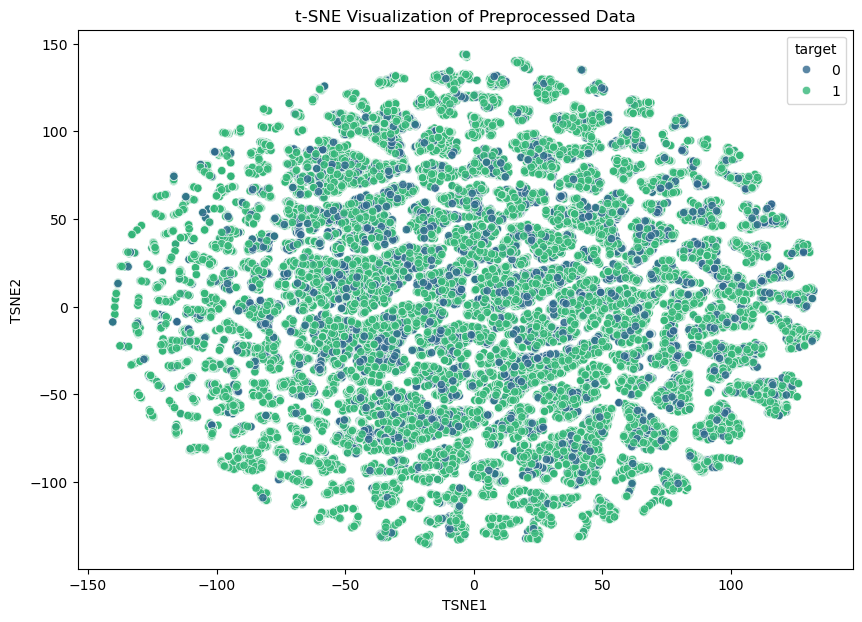

In [108]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=X_train_tsne_df, x='TSNE1', y='TSNE2', hue='target', palette='viridis', alpha=0.8)
plt.title("t-SNE Visualization of Preprocessed Data")
plt.show()

## Model Building

### DecisionTree Classifier

In [111]:
dt_1 = DecisionTreeClassifier(random_state=42)
dt_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [112]:
y_pred_dt = dt_1.predict(X_test)

In [113]:
# Print classification reports
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.23      0.24      9165
           1       0.81      0.82      0.81     35939

    accuracy                           0.70     45104
   macro avg       0.53      0.52      0.52     45104
weighted avg       0.69      0.70      0.70     45104



In [114]:
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    indices = importances.argsort()[::-1]
    
    plt.figure(figsize=(8, 6))
    plt.title(f"{model_name} Feature Importance")
    sns.barplot(x=importances[indices], y=X.columns[indices])
    plt.tight_layout()
    plt.show()

In [115]:
print(dt_1.feature_importances_)

[0.28069756 0.27800659 0.02517587 0.08041329 0.18782228 0.08828467
 0.00323479 0.05636494]


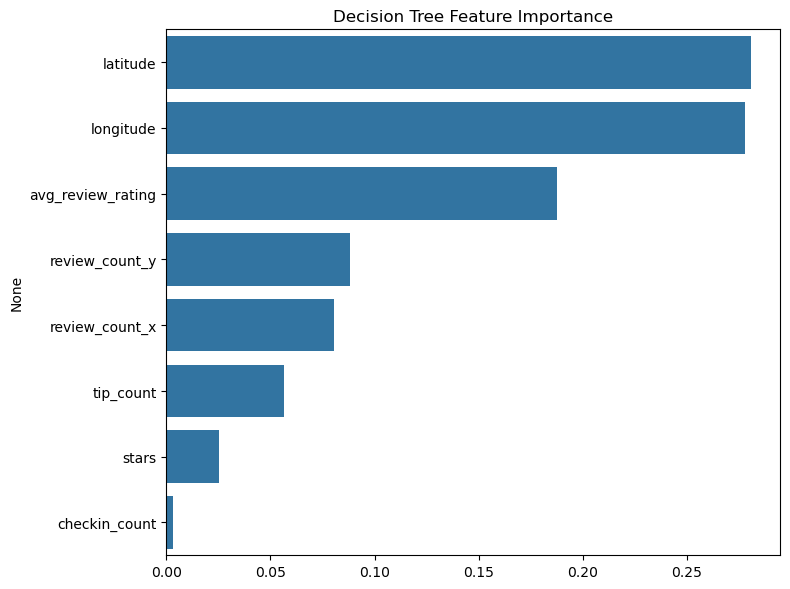

In [116]:
plot_feature_importance(dt_1, "Decision Tree")

In [117]:
y_pred_dt = dt_1.predict(X_test)

In [118]:
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.23      0.24      9165
           1       0.81      0.82      0.81     35939

    accuracy                           0.70     45104
   macro avg       0.53      0.52      0.52     45104
weighted avg       0.69      0.70      0.70     45104



In [119]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6979
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.23      0.24      9165
           1       0.81      0.82      0.81     35939

    accuracy                           0.70     45104
   macro avg       0.53      0.52      0.52     45104
weighted avg       0.69      0.70      0.70     45104



In [120]:
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])  # [:, 1] to get probabilities for class 1
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])

    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

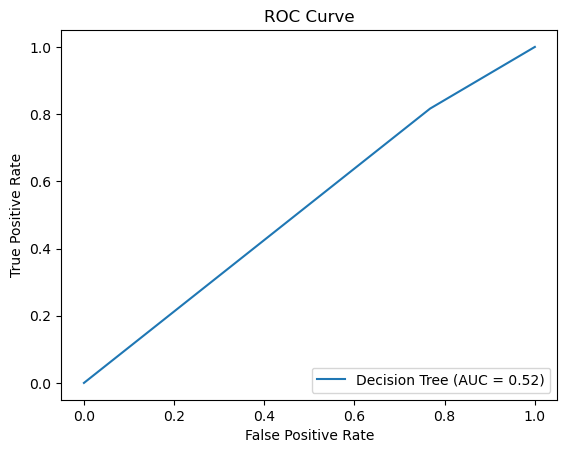

In [121]:
# Decision Tree ROC and AUC
y_pred_proba_dt = dt_1.predict_proba(X_test)
plot_roc_curve(y_test, y_pred_proba_dt, "Decision Tree")

#### Round_2

In [123]:
dt_2 = DecisionTreeClassifier(random_state=42)

In [124]:
param_grid_dt_2 = {'max_depth': [5, 10, 15, 20, None],'min_samples_split': [2, 10, 20],'min_samples_leaf': [1, 5, 10],'max_features': [None, 'sqrt', 'log2'],'criterion': ['gini', 'entropy']}

In [125]:
grid_search = GridSearchCV(estimator=dt_2, param_grid=param_grid_dt_2, cv=5, n_jobs=-1, scoring='roc_auc')

In [126]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='roc_auc')

In [127]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [128]:
print("Best Hyperparameters:", best_params)
print("Best ROC AUC Score:", best_score)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best ROC AUC Score: 0.6487955572128407


In [129]:
best_dt_2 = grid_search.best_estimator_

In [130]:
y_pred_2 = best_dt_2.predict(X_test)

In [131]:
accuracy = accuracy_score(y_test, y_pred_2)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.7956057112451224


In [132]:
print("Classification Report:\n", classification_report(y_test, y_pred_2))

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.02      0.03      9165
           1       0.80      0.99      0.89     35939

    accuracy                           0.80     45104
   macro avg       0.61      0.51      0.46     45104
weighted avg       0.72      0.80      0.71     45104



In [133]:
importances = best_dt_2.feature_importances_

#### Round_3

In [135]:
dt_3 = DecisionTreeClassifier(random_state=42)

In [136]:
param_grid_dt_3 = {
    'max_depth': [best_dt_2.max_depth - 2, best_dt_2.max_depth, best_dt_2.max_depth + 2],
    'min_samples_split': [best_dt_2.min_samples_split - 2, best_dt_2.min_samples_split, best_dt_2.min_samples_split + 2],
    'min_samples_leaf': [best_dt_2.min_samples_leaf - 1, best_dt_2.min_samples_leaf, best_dt_2.min_samples_leaf + 1],}

In [137]:
grid_search = GridSearchCV(estimator=dt_3, param_grid=param_grid_dt_3, cv=5, n_jobs=-1, scoring='roc_auc')

In [138]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12],
                         'min_samples_leaf': [0, 1, 2],
                         'min_samples_split': [18, 20, 22]},
             scoring='roc_auc')

In [139]:
best_dt_3 = grid_search.best_estimator_

In [140]:
# Predictions on the test set
y_pred_3 = best_dt_3.predict(X_test)

In [141]:
accuracy = accuracy_score(y_test, y_pred_3)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.7959161050017737


In [142]:
print("Classification Report:\n", classification_report(y_test, y_pred_3))

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.01      0.03      9165
           1       0.80      1.00      0.89     35939

    accuracy                           0.80     45104
   macro avg       0.62      0.50      0.46     45104
weighted avg       0.72      0.80      0.71     45104



In [143]:
# Get feature importances from the decision tree
importances = best_dt_3.feature_importances_

In [144]:
# Create a DataFrame to view feature names with their importance scores
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

In [145]:
# Display top features
print(feature_importances.head(10))

             feature  importance
7          tip_count    0.373720
5     review_count_y    0.223548
4  avg_review_rating    0.137193
1          longitude    0.082410
0           latitude    0.077268
3     review_count_x    0.064457
6      checkin_count    0.039808
2              stars    0.001596


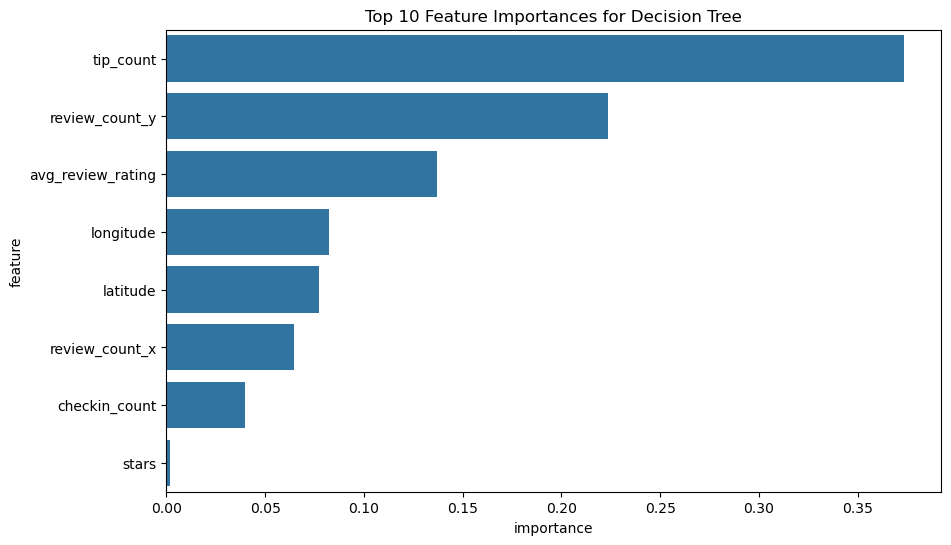

In [146]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title("Top 10 Feature Importances for Decision Tree")
plt.show()

### RandomForest Classifier

In [148]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [149]:
y_pred_rf = rf.predict(X_test)

In [150]:
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.05      0.10      9165
           1       0.80      0.98      0.88     35939

    accuracy                           0.79     45104
   macro avg       0.60      0.52      0.49     45104
weighted avg       0.72      0.79      0.72     45104



In [151]:
print(rf.feature_importances_)

[0.26363187 0.26340243 0.03287194 0.09701666 0.16028721 0.09810452
 0.00672658 0.0779588 ]


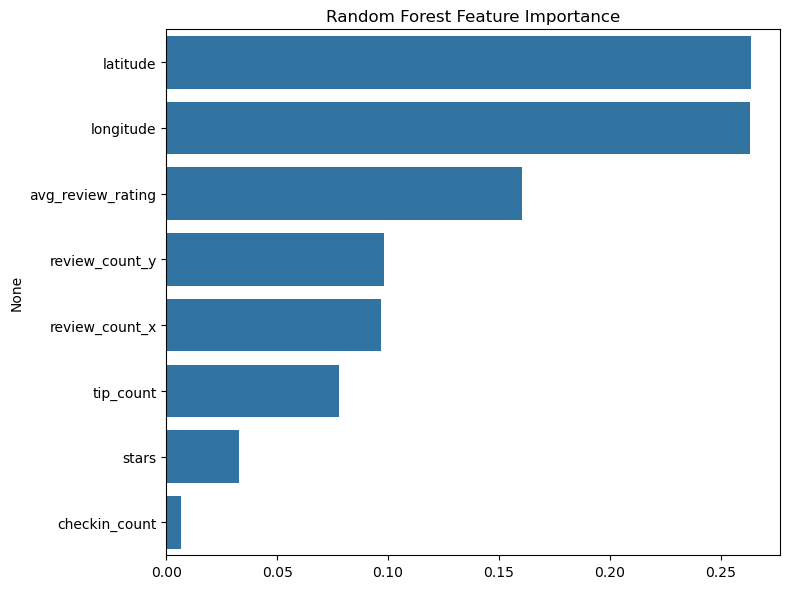

In [152]:
plot_feature_importance(rf, "Random Forest")

In [153]:
y_pred_rf = rf.predict(X_test)

In [154]:
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.05      0.10      9165
           1       0.80      0.98      0.88     35939

    accuracy                           0.79     45104
   macro avg       0.60      0.52      0.49     45104
weighted avg       0.72      0.79      0.72     45104



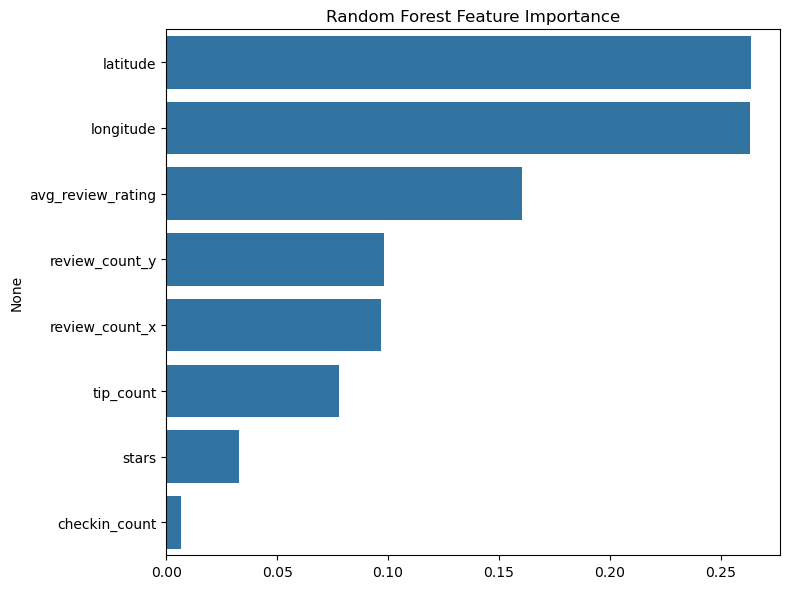

In [155]:
plot_feature_importance(rf, "Random Forest")

In [156]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7910
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.05      0.10      9165
           1       0.80      0.98      0.88     35939

    accuracy                           0.79     45104
   macro avg       0.60      0.52      0.49     45104
weighted avg       0.72      0.79      0.72     45104



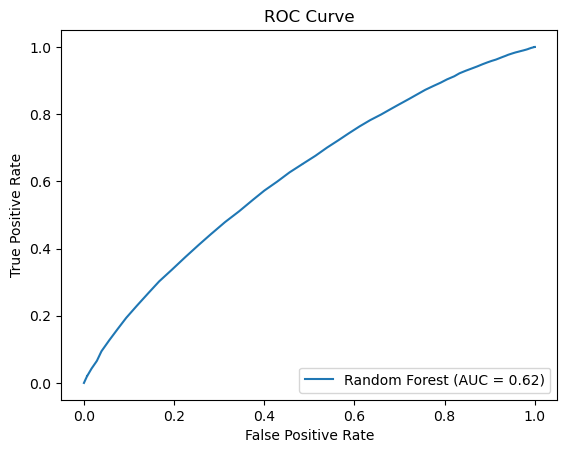

In [157]:
y_pred_proba_rf = rf.predict_proba(X_test)
plot_roc_curve(y_test, y_pred_proba_rf, "Random Forest")

#### Round_1

In [463]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]}

In [464]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [465]:
# Setup GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1, scoring='roc_auc')

In [ ]:
# Fit the model on the training data
grid_search_rf.fit(X_train, y_train)

In [ ]:
# Save the best estimator from the 1st round
best_rf_1 = grid_search_rf.best_estimator_

In [ ]:
# Print best parameters for the first round
print("Best parameters for Random Forest (1st round):", grid_search_rf.best_params_)

In [ ]:
# Predict on the test set
y_pred_rf_1 = best_rf_1.predict(X_test)

In [ ]:
# Calculate accuracy
rf_accuracy_1 = accuracy_score(y_test, y_pred_rf_1)
print("Random Forest Accuracy (1st round):", rf_accuracy_1)

In [ ]:
# Classification report
print("Random Forest Classification Report (1st round):")
print(classification_report(y_test, y_pred_rf_1))

In [ ]:
# Calculate ROC-AUC score
rf_roc_auc_1 = roc_auc_score(y_test, best_rf_1.predict_proba(X_test)[:, 1])
print("Random Forest ROC-AUC (1st round):", rf_roc_auc_1)

In [ ]:
# Feature importance
rf_feature_importance_1 = best_rf_1.feature_importances_
print("Random Forest Feature Importance (1st round):", rf_feature_importance_1)

#### Round_2

In [ ]:
# Refined parameter grid based on the results from 1st round
param_grid_rf_2 = {
    'n_estimators': [best_rf_1.n_estimators - 50, best_rf_1.n_estimators, best_rf_1.n_estimators + 50],
    'max_depth': [best_rf_1.max_depth - 5, best_rf_1.max_depth, best_rf_1.max_depth + 5],
    'min_samples_split': [best_rf_1.min_samples_split - 2, best_rf_1.min_samples_split, best_rf_1.min_samples_split + 2],
    'min_samples_leaf': [best_rf_1.min_samples_leaf - 1, best_rf_1.min_samples_leaf, best_rf_1.min_samples_leaf + 1]}

In [ ]:
# Setup GridSearchCV for the second round
grid_search_rf_2 = GridSearchCV(best_rf_1, param_grid_rf_2, cv=5, n_jobs=-1, scoring='roc_auc')

In [ ]:
# Fit the model on the training data
grid_search_rf_2.fit(X_train, y_train)

In [ ]:
# Save the best estimator from the 2nd round
best_rf_2 = grid_search_rf_2.best_estimator_

In [ ]:
# Print best parameters for the second round
print("Best parameters for Random Forest (2nd round):", grid_search_rf_2.best_params_)

In [ ]:
# Predict on the test set
y_pred_rf_2 = best_rf_2.predict(X_test)

In [ ]:
# Calculate accuracy
rf_accuracy_2 = accuracy_score(y_test, y_pred_rf_2)
print("Random Forest Accuracy (2nd round):", rf_accuracy_2)

In [ ]:
# Classification report
print("Random Forest Classification Report (2nd round):")
print(classification_report(y_test, y_pred_rf_2))

In [ ]:
# Calculate ROC-AUC score
rf_roc_auc_2 = roc_auc_score(y_test, best_rf_2.predict_proba(X_test)[:, 1])
print("Random Forest ROC-AUC (2nd round):", rf_roc_auc_2)

In [ ]:
# Feature importance
rf_feature_importance_2 = best_rf_2.feature_importances_
print("Random Forest Feature Importance (2nd round):", rf_feature_importance_2)

#### Round_3

In [ ]:
# Refine the parameter grid for the 3rd round
param_grid_rf_3 = {
    'n_estimators': [best_rf_2.n_estimators - 25, best_rf_2.n_estimators, best_rf_2.n_estimators + 25],
    'max_depth': [best_rf_2.max_depth - 2, best_rf_2.max_depth, best_rf_2.max_depth + 2],}

In [ ]:
# Setup GridSearchCV for the third round
grid_search_rf_3 = GridSearchCV(best_rf_2, param_grid_rf_3, cv=5, n_jobs=-1, scoring='roc_auc')

In [ ]:
# Fit the model on the training data
grid_search_rf_3.fit(X_train, y_train)

In [ ]:
# Save the best estimator from the 3rd round
best_rf_3 = grid_search_rf_3.best_estimator_

In [ ]:
# Print best parameters for the third round
print("Best parameters for Random Forest (3rd round):", grid_search_rf_3.best_params_)

In [ ]:
# Predict on the test set
y_pred_rf_3 = best_rf_3.predict(X_test)

In [ ]:
# Calculate accuracy
rf_accuracy_3 = accuracy_score(y_test, y_pred_rf_3)
print("Random Forest Accuracy (3rd round):", rf_accuracy_3)

In [ ]:
# Classification report
print("Random Forest Classification Report (3rd round):")
print(classification_report(y_test, y_pred_rf_3))

In [ ]:
# Calculate ROC-AUC score
rf_roc_auc_3 = roc_auc_score(y_test, best_rf_3.predict_proba(X_test)[:, 1])
print("Random Forest ROC-AUC (3rd round):", rf_roc_auc_3)

In [ ]:
# Feature importance
rf_feature_importance_3 = best_rf_3.feature_importances_
print("Random Forest Feature Importance (3rd round):", rf_feature_importance_3)

### AdaBoost Classifier

In [310]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [312]:
y_pred_ada = ada.predict(X_test)

In [314]:
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_ada))

AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.01      0.01      9165
           1       0.80      1.00      0.89     35939

    accuracy                           0.80     45104
   macro avg       0.66      0.50      0.45     45104
weighted avg       0.74      0.80      0.71     45104



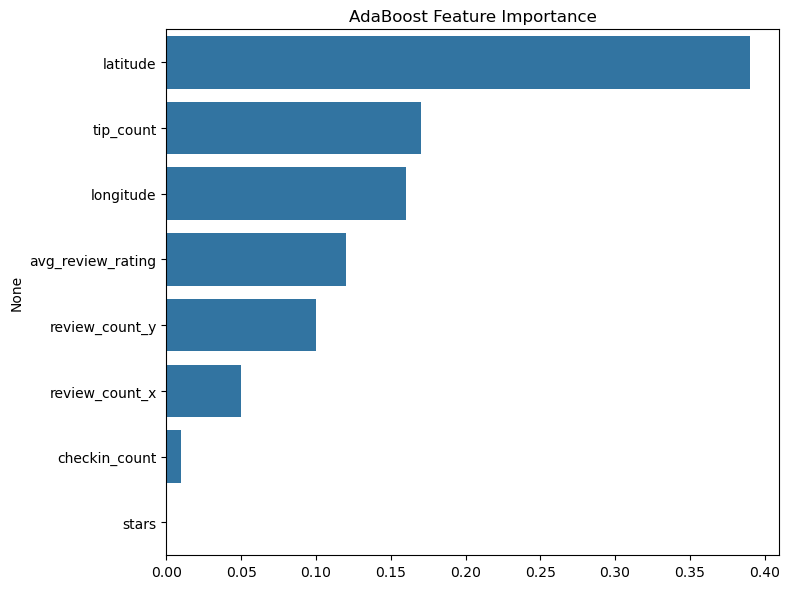

In [316]:
plot_feature_importance(ada, "AdaBoost")

In [318]:
print(ada.feature_importances_)

[0.39 0.16 0.   0.05 0.12 0.1  0.01 0.17]


In [320]:
y_pred_ada = ada.predict(X_test)

In [322]:
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_ada))

AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.01      0.01      9165
           1       0.80      1.00      0.89     35939

    accuracy                           0.80     45104
   macro avg       0.66      0.50      0.45     45104
weighted avg       0.74      0.80      0.71     45104



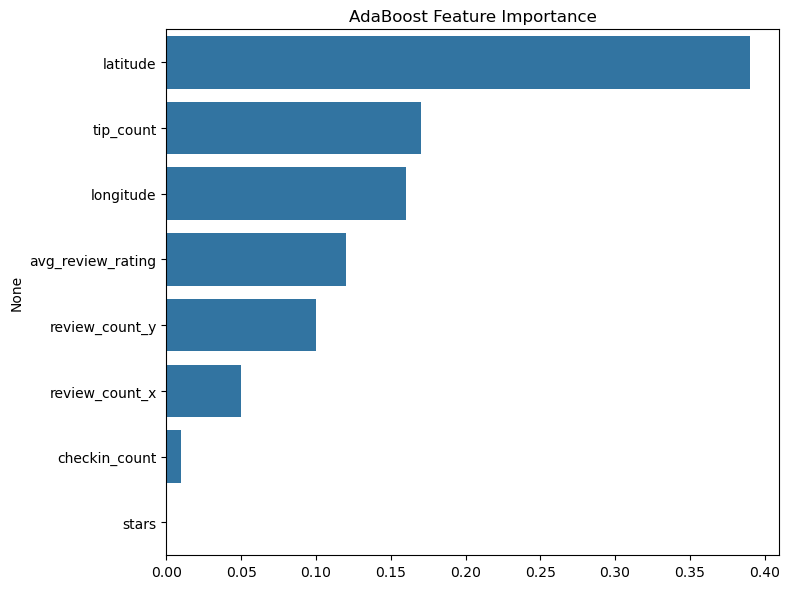

In [324]:
plot_feature_importance(ada, "AdaBoost")

In [326]:
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {accuracy_ada:.4f}")
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_ada))

AdaBoost Accuracy: 0.7969
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.01      0.01      9165
           1       0.80      1.00      0.89     35939

    accuracy                           0.80     45104
   macro avg       0.66      0.50      0.45     45104
weighted avg       0.74      0.80      0.71     45104



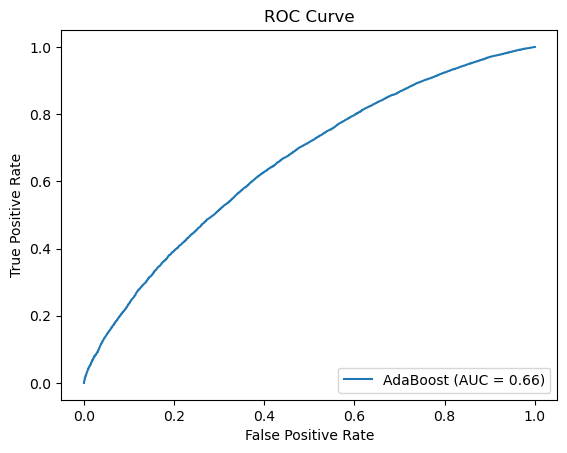

In [328]:
y_pred_proba_ada = ada.predict_proba(X_test)
plot_roc_curve(y_test, y_pred_proba_ada, "AdaBoost")

#### Round_1

In [331]:
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 2],
    'algorithm': ['SAMME', 'SAMME.R']}

In [333]:
# Initialize the AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)

In [335]:
# Setup GridSearchCV for AdaBoost
grid_search_ada = GridSearchCV(ada, param_grid_ada, cv=5, n_jobs=-1, scoring='roc_auc')

In [337]:
# Fit the model on the training data
grid_search_ada.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1, 2],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [338]:
# Save the best estimator from the 1st round
best_ada_1 = grid_search_ada.best_estimator_

In [339]:
# Print best parameters for the first round
print("Best parameters for AdaBoost (1st round):", grid_search_ada.best_params_)

Best parameters for AdaBoost (1st round): {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 200}


In [340]:
# Predict on the test set
y_pred_ada_1 = best_ada_1.predict(X_test)

In [341]:
# Calculate accuracy
ada_accuracy_1 = accuracy_score(y_test, y_pred_ada_1)
print("AdaBoost Accuracy (1st round):", ada_accuracy_1)

AdaBoost Accuracy (1st round): 0.7970246541326712


In [342]:
# Classification report
print("AdaBoost Classification Report (1st round):")
print(classification_report(y_test, y_pred_ada_1))

AdaBoost Classification Report (1st round):
              precision    recall  f1-score   support

           0       0.54      0.01      0.02      9165
           1       0.80      1.00      0.89     35939

    accuracy                           0.80     45104
   macro avg       0.67      0.50      0.45     45104
weighted avg       0.74      0.80      0.71     45104



In [343]:
# Calculate ROC-AUC score
ada_roc_auc_1 = roc_auc_score(y_test, best_ada_1.predict_proba(X_test)[:, 1])
print("AdaBoost ROC-AUC (1st round):", ada_roc_auc_1)

AdaBoost ROC-AUC (1st round): 0.6597316538675805


In [344]:
# Feature importance
ada_feature_importance_1 = best_ada_1.feature_importances_
print("AdaBoost Feature Importance (1st round):", ada_feature_importance_1)

AdaBoost Feature Importance (1st round): [0.355 0.29  0.005 0.035 0.105 0.07  0.01  0.13 ]


#### Round_2

In [346]:
# Refined parameter grid based on the results from 1st round
param_grid_ada_2 = {
    'n_estimators': [best_ada_1.n_estimators - 50, best_ada_1.n_estimators, best_ada_1.n_estimators + 50],
    'learning_rate': [best_ada_1.learning_rate - 0.5, best_ada_1.learning_rate, best_ada_1.learning_rate + 0.5],
    'algorithm': [best_ada_1.algorithm]
}

In [347]:
# Setup GridSearchCV for the second round
grid_search_ada_2 = GridSearchCV(best_ada_1, param_grid_ada_2, cv=5, n_jobs=-1, scoring='roc_auc')

In [348]:
# Fit the model on the training data
grid_search_ada_2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(learning_rate=1, n_estimators=200,
                                          random_state=42),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'],
                         'learning_rate': [0.5, 1, 1.5],
                         'n_estimators': [150, 200, 250]},
             scoring='roc_auc')

In [349]:
# Save the best estimator from the 2nd round
best_ada_2 = grid_search_ada_2.best_estimator_

In [350]:
# Print best parameters for the second round
print("Best parameters for AdaBoost (2nd round):", grid_search_ada_2.best_params_)

Best parameters for AdaBoost (2nd round): {'algorithm': 'SAMME.R', 'learning_rate': 1.5, 'n_estimators': 250}


In [351]:
# Predict on the test set
y_pred_ada_2 = best_ada_2.predict(X_test)

In [352]:
# Calculate accuracy
ada_accuracy_2 = accuracy_score(y_test, y_pred_ada_2)
print("AdaBoost Accuracy (2nd round):", ada_accuracy_2)

AdaBoost Accuracy (2nd round): 0.7968472862717275


In [353]:
# Classification report
print("AdaBoost Classification Report (2nd round):")
print(classification_report(y_test, y_pred_ada_2))

AdaBoost Classification Report (2nd round):
              precision    recall  f1-score   support

           0       0.50      0.01      0.03      9165
           1       0.80      1.00      0.89     35939

    accuracy                           0.80     45104
   macro avg       0.65      0.50      0.46     45104
weighted avg       0.74      0.80      0.71     45104



In [354]:
# Calculate ROC-AUC score
ada_roc_auc_2 = roc_auc_score(y_test, best_ada_2.predict_proba(X_test)[:, 1])
print("AdaBoost ROC-AUC (2nd round):", ada_roc_auc_2)

AdaBoost ROC-AUC (2nd round): 0.6579559651805591


In [355]:
# Feature importance
ada_feature_importance_2 = best_ada_2.feature_importances_
print("AdaBoost Feature Importance (2nd round):", ada_feature_importance_2)

AdaBoost Feature Importance (2nd round): [0.34  0.288 0.004 0.064 0.108 0.052 0.012 0.132]


#### Round_3

In [357]:
# Refine the parameter grid for the 3rd round
param_grid_ada_3 = {
    'n_estimators': [best_ada_2.n_estimators - 25, best_ada_2.n_estimators, best_ada_2.n_estimators + 25],
    'learning_rate': [best_ada_2.learning_rate - 0.2, best_ada_2.learning_rate, best_ada_2.learning_rate + 0.2],
    'algorithm': [best_ada_2.algorithm]
}

In [358]:
# Setup GridSearchCV for the third round
grid_search_ada_3 = GridSearchCV(best_ada_2, param_grid_ada_3, cv=5, n_jobs=-1, scoring='roc_auc')

In [359]:
# Fit the model on the training data
grid_search_ada_3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(learning_rate=1.5, n_estimators=250,
                                          random_state=42),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'],
                         'learning_rate': [1.3, 1.5, 1.7],
                         'n_estimators': [225, 250, 275]},
             scoring='roc_auc')

In [360]:
# Save the best estimator from the 3rd round
best_ada_3 = grid_search_ada_3.best_estimator_

In [361]:
# Print best parameters for the third round
print("Best parameters for AdaBoost (3rd round):", grid_search_ada_3.best_params_)

Best parameters for AdaBoost (3rd round): {'algorithm': 'SAMME.R', 'learning_rate': 1.5, 'n_estimators': 275}


In [362]:
# Predict on the test set
y_pred_ada_3 = best_ada_3.predict(X_test)

In [363]:
# Calculate accuracy
ada_accuracy_3 = accuracy_score(y_test, y_pred_ada_3)
print("AdaBoost Accuracy (3rd round):", ada_accuracy_3)

AdaBoost Accuracy (3rd round): 0.7970246541326712


In [364]:
# Classification report
print("AdaBoost Classification Report (3rd round):")
print(classification_report(y_test, y_pred_ada_3))

AdaBoost Classification Report (3rd round):
              precision    recall  f1-score   support

           0       0.52      0.01      0.03      9165
           1       0.80      1.00      0.89     35939

    accuracy                           0.80     45104
   macro avg       0.66      0.51      0.46     45104
weighted avg       0.74      0.80      0.71     45104



In [365]:
# Calculate ROC-AUC score
ada_roc_auc_3 = roc_auc_score(y_test, best_ada_3.predict_proba(X_test)[:, 1])
print("AdaBoost ROC-AUC (3rd round):", ada_roc_auc_3)

AdaBoost ROC-AUC (3rd round): 0.6587099690514875


In [366]:
# Feature importance
ada_feature_importance_3 = best_ada_3.feature_importances_
print("AdaBoost Feature Importance (3rd round):", ada_feature_importance_3)

AdaBoost Feature Importance (3rd round): [0.32363636 0.32727273 0.00363636 0.06181818 0.10545455 0.04727273
 0.01090909 0.12      ]


### XGB Classifier

In [368]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [369]:
# Model evaluations
y_pred_xgb = xgb_model.predict(X_test)

In [370]:
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.02      0.04      9165
           1       0.80      0.99      0.89     35939

    accuracy                           0.80     45104
   macro avg       0.64      0.51      0.46     45104
weighted avg       0.73      0.80      0.71     45104



In [371]:
print(xgb_model.feature_importances_)

[0.08487783 0.09080517 0.06347886 0.07714705 0.08698861 0.14203517
 0.2886228  0.16604452]


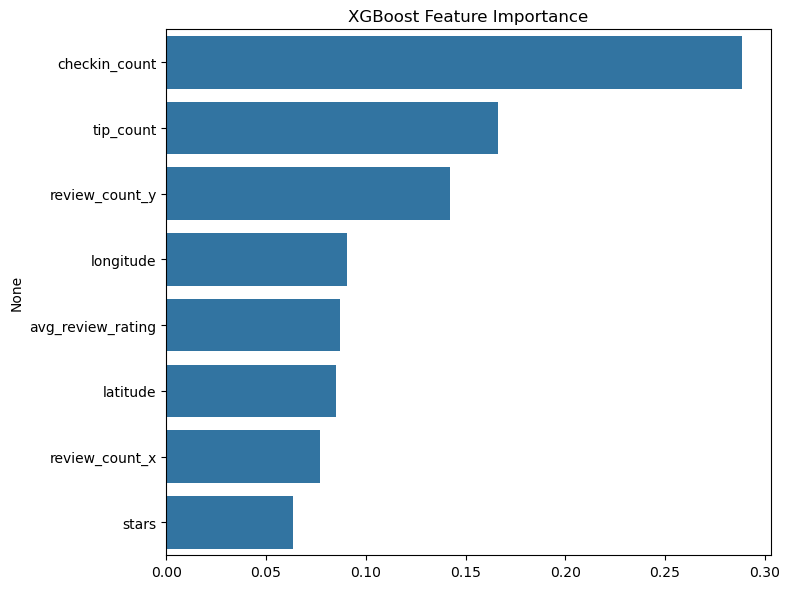

In [372]:
plot_feature_importance(xgb_model, "XGBoost")

In [373]:
y_pred_xgb = xgb_model.predict(X_test)

In [374]:
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.02      0.04      9165
           1       0.80      0.99      0.89     35939

    accuracy                           0.80     45104
   macro avg       0.64      0.51      0.46     45104
weighted avg       0.73      0.80      0.71     45104



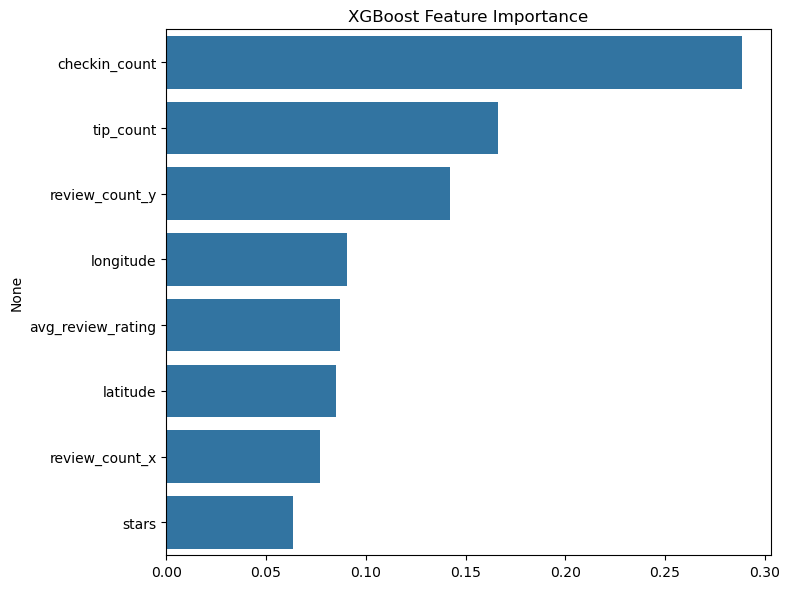

In [375]:
plot_feature_importance(xgb_model, "XGBoost")

In [376]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7964
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.02      0.04      9165
           1       0.80      0.99      0.89     35939

    accuracy                           0.80     45104
   macro avg       0.64      0.51      0.46     45104
weighted avg       0.73      0.80      0.71     45104



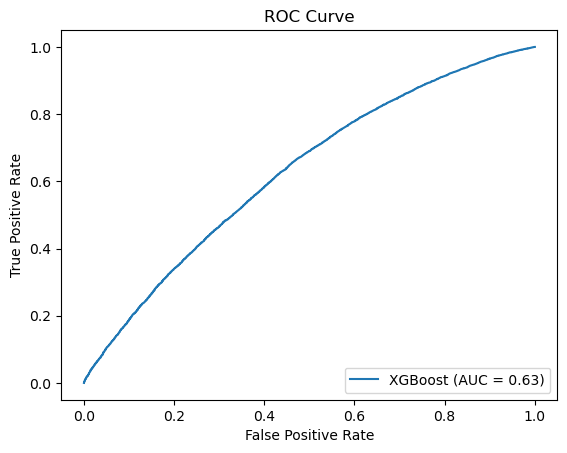

In [377]:
y_pred_proba_xgb = xgb_model.predict_proba(X_test)
plot_roc_curve(y_test, y_pred_proba_xgb, "XGBoost")

### Lime

In [379]:
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns.tolist(), class_names=['Not Validated', 'Validated'], discretize_continuous=True)
lime_exp = explainer_lime.explain_instance(X_test.values[0], rf.predict_proba)
lime_exp.show_in_notebook()

In [ ]:
explainer_shap = shap.TreeExplainer(rf)
shap_values = explainer_shap.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test, feature_names=X.columns)